In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('git_extraction/DF_Radiomics_noduls_with_diagnose_train_data.csv')

In [8]:
df.head()

,Patient,Node,Labels,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_firstorder_10Percentile,original_firstorder_90Percentile,...,diagnostics_Mask-original_BoundingBox_2,diagnostics_Mask-original_BoundingBox_3,diagnostics_Mask-original_BoundingBox_4,diagnostics_Mask-original_BoundingBox_5,diagnostics_Mask-original_CenterOfMassIndex_0,diagnostics_Mask-original_CenterOfMassIndex_1,diagnostics_Mask-original_CenterOfMassIndex_2,diagnostics_Mask-original_CenterOfMass_0,diagnostics_Mask-original_CenterOfMass_1,diagnostics_Mask-original_CenterOfMass_2
0,LIDC-IDRI-0137,Node_N1,3,-671.885608,-2048.0,3071.0,26,1,175.5,850.5,...,30,4,6,2,332.692308,389.538462,30.307692,53.215868,83.626926,-321.730769
1,LIDC-IDRI-0377,Node_N1,2,-882.321409,-3024.0,3071.0,2402,1,-307.0,61.0,...,169,29,24,9,382.402998,308.854288,173.039550,92.739302,28.898399,-68.460564
2,LIDC-IDRI-0167,Node_N1,1,-664.766231,-2048.0,3071.0,56,1,-444.5,-66.5,...,50,6,9,2,70.267857,174.964286,50.321429,-136.237780,-53.812866,-234.696429
3,LIDC-IDRI-0272,Node_N1,3,-824.358062,-2048.0,3071.0,51,1,-447.0,102.0,...,81,6,7,2,209.313725,390.941176,81.568627,-47.673652,80.722794,-109.078431
4,LIDC-IDRI-0234,Node_N1,1,-708.012378,-2048.0,3029.0,251,1,-569.0,82.0,...,41,11,14,3,367.756972,310.848606,41.689243,65.179121,43.765426,-236.276892


In [5]:
df.describe()

,Labels,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,...,diagnostics_Mask-original_BoundingBox_2,diagnostics_Mask-original_BoundingBox_3,diagnostics_Mask-original_BoundingBox_4,diagnostics_Mask-original_BoundingBox_5,diagnostics_Mask-original_CenterOfMassIndex_0,diagnostics_Mask-original_CenterOfMassIndex_1,diagnostics_Mask-original_CenterOfMassIndex_2,diagnostics_Mask-original_CenterOfMass_0,diagnostics_Mask-original_CenterOfMass_1,diagnostics_Mask-original_CenterOfMass_2
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000,...,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,2.109312,-812.114383,-2169.785425,3272.720648,1511.765182,1.040486,-456.829555,109.939676,3.093523e+08,4.391201,...,82.477733,16.425101,17.574899,5.886640,269.922457,295.507630,84.926912,5.750866,31.431356,-176.743313
std,0.850750,79.622532,318.153754,1852.761417,3018.467889,0.251783,214.458433,433.363864,1.600967e+09,0.697244,...,54.294276,13.085765,13.691188,4.919195,105.572325,62.603881,55.299117,79.647726,47.083494,67.825010
min,1.000000,-1060.053323,-3024.000000,1433.000000,9.000000,1.000000,-977.000000,-868.000000,4.019700e+04,2.058814,...,16.000000,3.000000,3.000000,1.000000,70.096154,124.777778,20.307399,-165.429959,-96.407935,-321.730769
25%,1.000000,-847.960683,-2048.000000,3071.000000,96.000000,1.000000,-573.800000,-37.200000,1.019299e+07,4.066642,...,48.000000,7.500000,8.000000,3.000000,171.389050,257.438380,50.139309,-66.692071,1.343186,-224.088068
50%,2.000000,-807.289508,-2048.000000,3071.000000,195.000000,1.000000,-451.000000,51.000000,2.638430e+07,4.457243,...,70.000000,11.000000,11.000000,4.000000,306.251534,307.552434,73.176136,29.822032,36.248825,-176.423077
75%,3.000000,-753.638585,-2048.000000,3071.000000,1415.500000,1.000000,-347.200000,115.500000,8.854804e+07,4.803005,...,93.000000,21.500000,24.500000,7.000000,359.054558,341.987226,94.120014,73.416244,69.507265,-123.085220
max,3.000000,-651.262213,-2048.000000,17739.000000,20671.000000,4.000000,282.400000,1624.000000,1.724990e+10,6.146215,...,335.000000,63.000000,69.000000,26.000000,455.928230,440.288889,340.955511,129.459821,116.878128,-10.861981


All columns starting with 'diagnostics' only contain general information about the image and are not features.

In [11]:
# Select columns that start with 'diagnostics'
diagnostics_columns = df.filter(like='diagnostics', axis=1)

# Drop columns starting with 'diagnostics'
df = df.drop(diagnostics_columns.columns, axis=1)

In [12]:
# Calculate correlation matrix
correlation_matrix = df.drop(['Patient', 'Node', 'Labels'], axis=1).corr()

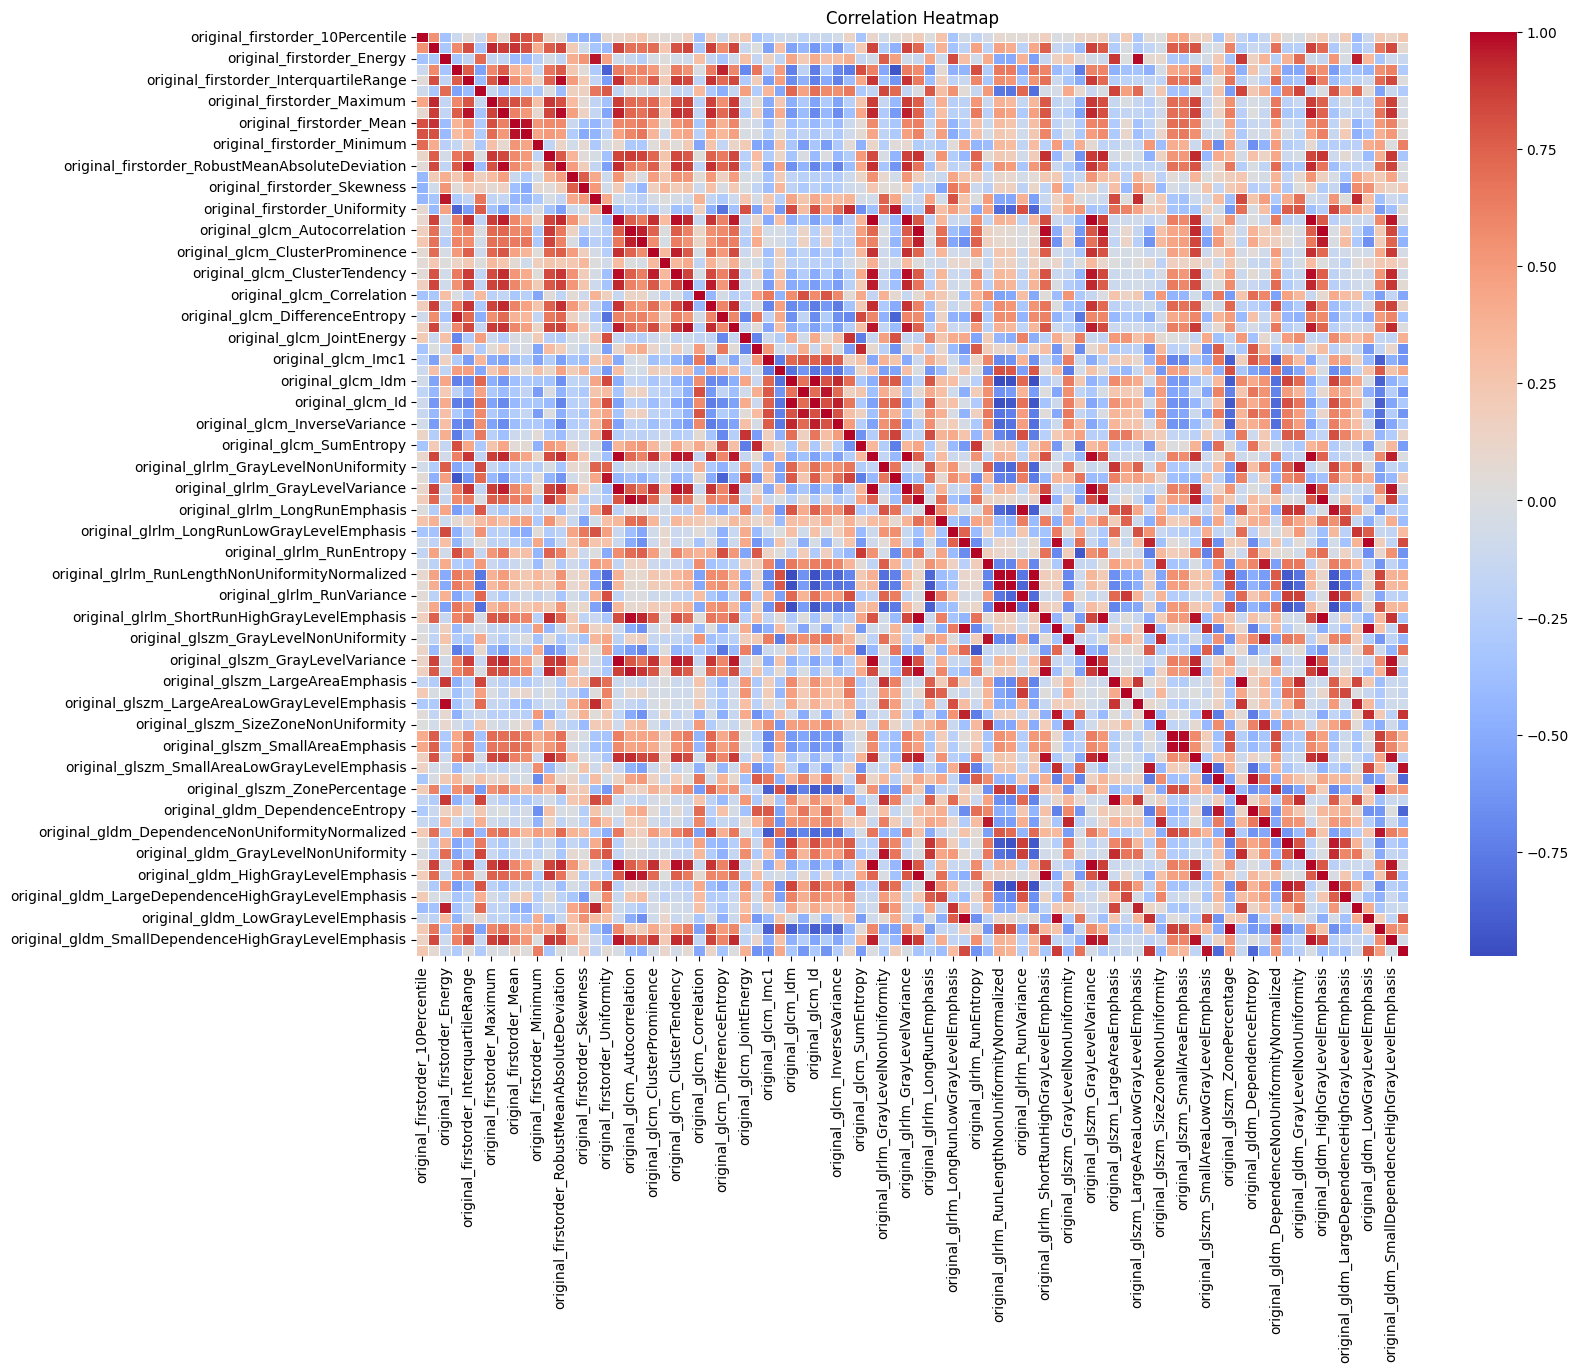

In [13]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()